In [1]:
from qiskit import *
from qiskit.quantum_info import Statevector, partial_trace, DensityMatrix, state_fidelity 
import numpy as np
from qiskit_aer import AerSimulator

### a graph state ∣G⟩ is associated with a graph, G=(V,E), where the vertices (v∈V) represent qubits initialised into the ∣+⟩=(∣0⟩+∣1⟩)/sqrt(2) state, and edges (e∈E) represent the application of controlled-phase (CZ) gates between respective vertices. An important special case is the two-qubit graph state, which is locally equivalent to a maximally-entangled Bell pair. So the state distribuition protocol using DIQT will be same as bell for 2 qubit

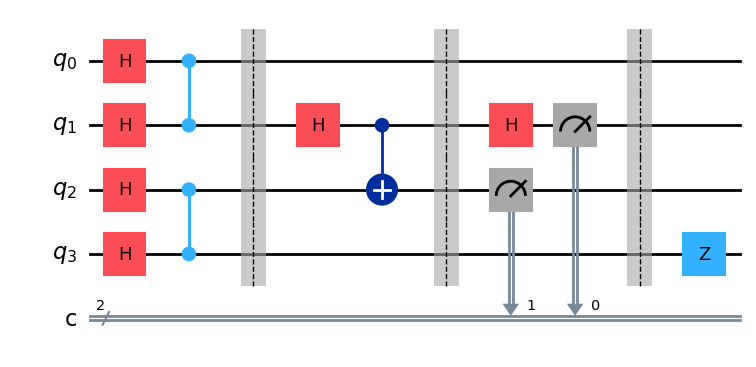

In [2]:
qc = QuantumCircuit(4,2)
#creating 2qubit graph states
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.cz(0,1)
qc.cz(2,3)
qc.barrier()
#Performing Quantum walk
qc.h(1)
qc.cx(1,2)
qc.barrier()
#Measurement
qc.h(1)
qc.measure(1,0)
qc.measure(2,1)
qc.barrier()
#Local recovery operation
qc.z(3)
qc.draw('mpl')

In [3]:
qc.save_statevector(label="psi")

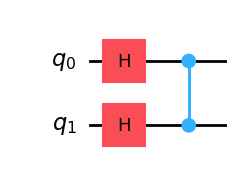

In [4]:
_2qgraph = QuantumCircuit(2)
_2qgraph.h(0)
_2qgraph.h(1)
_2qgraph.cz(0,1)
_2qgraph.draw('mpl')

In [11]:
twoQubitGraph = Statevector.from_instruction(_2qgraph)

In [12]:
sim = AerSimulator(
    method="statevector")

In [13]:
result = sim.run(qc).result()
psi = result.data(0)["psi"]

rho_end = partial_trace(DensityMatrix(psi), [1,2])

In [14]:
print(state_fidelity(rho_end, twoQubitGraph))

0.9999999999999996


In [17]:
import numpy as np
from qiskit.quantum_info import Pauli, Operator
# Define stabilizers on 2 qubits 
K1 = Pauli("XX")    
K2 = Pauli("ZZ")   
K3 = Pauli("XZ")    
K4 = Pauli("ZX")


def expval(rho, pauli):
    P1 = Operator(pauli).data
    return np.real(np.trace(rho @ P1))

print("<K0> =", expval(rho_end, K1))
print("<K4> =", expval(rho_end, K2))
print("<K4> =", expval(rho_end, K3))
print("<K4> =", expval(rho_end, K4))

<K0> = 0.0
<K4> = 0.0
<K4> = 1.0
<K4> = 1.0


### 2 qubit graph state has been distributed successfully. Now it's time for 3 qubit

#### Distribution of 3 qubit graph state amongg two parties

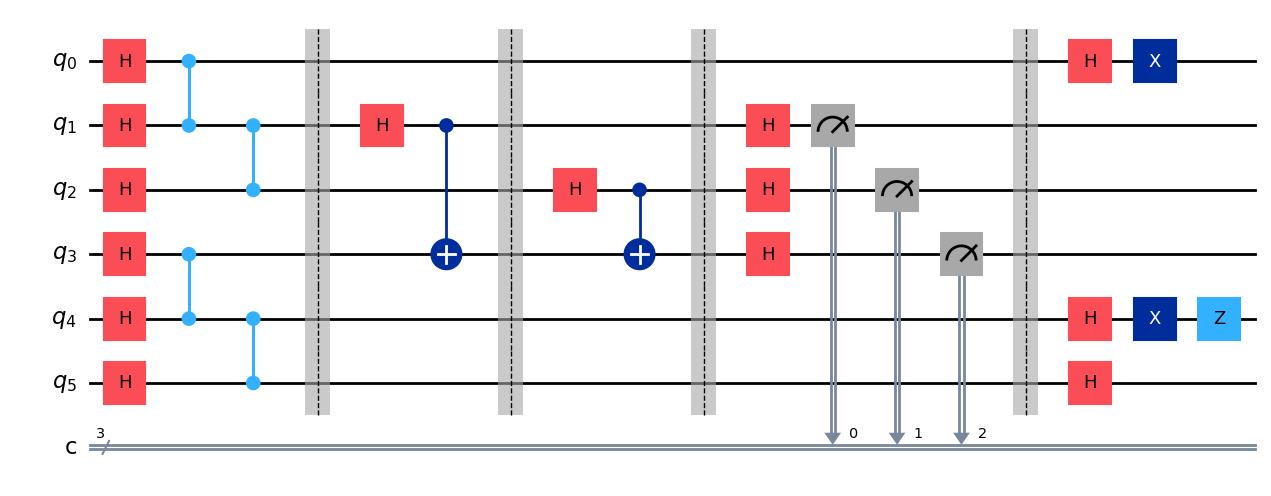

In [19]:
qc1 = QuantumCircuit(6,3)
#creating 3qubit graph states
qc1.h(0)
qc1.h(1)
qc1.h(2)
qc1.h(3)
qc1.h(4)
qc1.h(5)
qc1.cz(0,1)
qc1.cz(1,2)
qc1.cz(3,4)
qc1.cz(4,5)
qc1.barrier()
#Performing Quantum walk
qc1.h(1)
qc1.cx(1,3)
qc1.barrier()
qc1.h(2)
qc1.cx(2,3)
qc1.barrier()
#Measurement
qc1.h(1)
qc1.h(2)
qc1.h(3)
qc1.measure(1,0)
qc1.measure(2,1)
qc1.measure(3,2)
qc1.barrier()
#Local recovery operationqc1.h(1)
qc1.h(0)
qc1.x(0)
qc1.h(4)
qc1.x(4)
qc1.h(5)
qc1.z(4)
#qc1
qc1.draw('mpl')

In [20]:
qc_ff = qc1.copy()

In [21]:
# If m1 == 1 → Z on q0
with qc_ff.if_test((qc_ff.clbits[0], 1)):
    qc_ff.z(0)

# If m2 == 1 → X on q5
with qc_ff.if_test((qc_ff.clbits[1], 1)):
    qc_ff.x(5)

# If m3 == 1 → Z on q4
with qc_ff.if_test((qc_ff.clbits[2], 1)):
    qc_ff.z(4)


In [22]:
qc1.save_statevector(label="psi1")

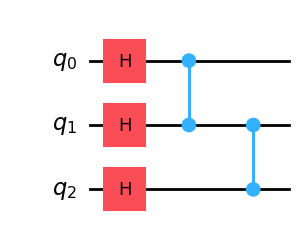

In [23]:
_3qgraph = QuantumCircuit(3)
_3qgraph.h(0)
_3qgraph.h(1)
_3qgraph.h(2)
_3qgraph.cz(0,1)
_3qgraph.cz(1,2)

_3qgraph.draw('mpl')

In [24]:
threeQubitGraph = Statevector.from_instruction(_3qgraph)

In [25]:
result1 = sim.run(qc1).result()
psi1 = result1.data(0)["psi1"]

rho_end1 = partial_trace(DensityMatrix(psi1), [1,2,3])

In [26]:
print(state_fidelity(rho_end1, threeQubitGraph))

3.7493994566546454e-33


In [27]:
print(psi1)

Statevector([ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              2.29934717e-17-4.32978028e-17j,
             -2.29934717e-17+4.32978028e-17j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -0.00000000e+00+0.00000000e+00j,
             -0.00000000e+00+0.00000000e+00j,
             -0.00000000e+00+0.00000000e+00j,
             -0.00000000e+00+0.00000000e+00j,
             -0.00000000e+00+0.00000000e+00j,
             -0.00000000e+00+0.000

In [28]:
sim1 = AerSimulator(method="density_matrix")

qc_ff.save_density_matrix()
result2 = sim1.run(qc_ff, shots=1).result()

rho_full2 = result2.data(0)["density_matrix"]

from qiskit.quantum_info import partial_trace
rho_end2 = partial_trace(rho_full2, [1,2,3])

In [29]:
print(state_fidelity(rho_end2, threeQubitGraph))

3.3228455475580213e-32


In [30]:
print(threeQubitGraph)

Statevector([ 0.35355339+0.j,  0.35355339+0.j,  0.35355339+0.j,
             -0.35355339+0.j,  0.35355339+0.j,  0.35355339+0.j,
             -0.35355339+0.j,  0.35355339+0.j],
            dims=(2, 2, 2))


In [31]:


# Define stabilizers on 3 qubits (ordering: q0, q4, q5)
K0 = Pauli("IZX")   # X0 Z4
K4 = Pauli("ZXZ")   # Z5 X4 Z0
K5 = Pauli("XZI")   # Z4 X5

def expval(rho, pauli):
    P = Operator(pauli).data
    return np.real(np.trace(rho @ P))

print("<K0> =", expval(rho_end2, K0))
print("<K4> =", expval(rho_end2, K4))
print("<K5> =", expval(rho_end2, K5))


<K0> = -2.7369110631344083e-48
<K4> = -1.0000000000000007
<K5> = -7.498798913309302e-33
